### Pós-graduação em Ciência de Dados e Machine Learning

#### Disciplina: **Introdução a Redes Neurais**

#### Projeto Final para disciplina Introdução a Redes Neurais

<BR>
    

#### Nome: Moacir Vidal
#### RA: 52200205



#### Descrição do Problema

Descreva o problema que deseja resolver com machine learning fazendo um breve resumo do dataset. Utilizem algum dataset que não foi tratado no decorrer do curso. Seria interessante que a base de dados seja referente a algum caso real.

Em seguida, expliquem o porque escolheram o algoritmo de machine learning que vão usar para solucionar o problema. 

Seguem alguns sites para download de datasets:

http://archive.ics.uci.edu/ml/index.php

https://www.kaggle.com/

https://dados.gov.br/dataset

- Foi usado um dataset do Kaggle que apresenta imagens de ambientes naturais em todo mundo.
- São 25 mil imagens de tamanho 150x150 distribuído em 6 categorias que são:
>> - buildings = 0 
>> - forest = 1
>> - glacier = 2
>> - mountain = 3
>> - sea = 4
>> - street = 5

- os dados estão divididos entre pastas de treino, teste e validação

#### Algoritmo

Qual o motivo da escolha do algoritmo para resolver este problema ?

- O dataset foi escolhido pois são dados variados e que podem ser explorados de varias formas, nesse caso foi usado o mesmo dataset e construido uma CNN para classificar as imagens de ambientes diversos e também uma GAN para tentar gerar imagens de um ambiente especifico.

#### Dataset
- Essas linhas abaixo são da API do kaggle, tudo foi baixado diretamente dela, e usado a credencial da conta para poder acessar os dados.
- Caso o metodo do kaggle não funcione é possivel baixar os dados no link: https://www.kaggle.com/datasets/puneet6060/intel-image-classification


# Build GANs models for Sea landscape 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# caso não funcione dê um ! pip install kaggle
# entre na conta do kaggle, e baixe a chave acesso da api e deixe no drive.
! mkdir ~/.kaggle

Conectar com o MyDrive de cada usuário ----- IMPORTANTE -----

---



In [ ]:
## Moacir Vidal
!cp /content/drive/MyDrive/kagglejson/kaggle.json ~/.kaggle/kaggle.json



In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d puneet6060/intel-image-classification  

 99% 344M/346M [00:17<00:00, 22.1MB/s]
100% 346M/346M [00:17<00:00, 20.6MB/s]


In [ ]:
! unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

#### Importando bibliotecas

In [ ]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import cv2
import uuid
import keras
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import random
import time
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, Reshape, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Conv2DTranspose

from tensorflow.compat.v1.keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.utils import plot_model
from psutil import virtual_memory
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.layers import LeakyReLU


from tqdm import tqdm
from PIL import Image as Img
from keras.optimizers import RMSprop

#### Importando base e visualizando dados


In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/seg_train/seg_train"):
  print(f"Existem {len(dirnames)} pastas e {len(filenames)} imagens em {dirpath}")

Existem 6 pastas e 0 imagens em /content/seg_train/seg_train
Existem 0 pastas e 2382 imagens em /content/seg_train/seg_train/street
Existem 0 pastas e 2404 imagens em /content/seg_train/seg_train/glacier
Existem 0 pastas e 2271 imagens em /content/seg_train/seg_train/forest
Existem 0 pastas e 2274 imagens em /content/seg_train/seg_train/sea
Existem 0 pastas e 2512 imagens em /content/seg_train/seg_train/mountain
Existem 0 pastas e 2191 imagens em /content/seg_train/seg_train/buildings


In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/seg_test/seg_test"):
  print(f"Existem {len(dirnames)} pastas e {len(filenames)} imagens em {dirpath}")

Existem 6 pastas e 0 imagens em /content/seg_test/seg_test
Existem 0 pastas e 501 imagens em /content/seg_test/seg_test/street
Existem 0 pastas e 553 imagens em /content/seg_test/seg_test/glacier
Existem 0 pastas e 474 imagens em /content/seg_test/seg_test/forest
Existem 0 pastas e 510 imagens em /content/seg_test/seg_test/sea
Existem 0 pastas e 525 imagens em /content/seg_test/seg_test/mountain
Existem 0 pastas e 437 imagens em /content/seg_test/seg_test/buildings


In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/seg_pred/seg_pred"):
  print(f"Existem {len(dirnames)} pastas e {len(filenames)} imagens em {dirpath}")

Existem 0 pastas e 7301 imagens em /content/seg_pred/seg_pred


- As funções abaixo servem para listar as imagens e suas extensões e alocá-las dentro de uma variavel chamada imagens que contem uma lista, além disso as imagens foram redimensionadas para o tamanho ed 64x64 para facilitar o treinamento e diminuir um pouco o processamento do modelo.

In [ ]:
def list_images(basePath, contains=None):
  # retorna extensoes de arquivos validas para uso
    return list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp"), contains=contains)

def list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp"), contains=None):
  # faz um loop sobre a estrutura de diretorio
    for (rootDir, dirNames, filenames) in os.walk(basePath):
    # faz um loop sobre os nomes dos arquivos no diretório atual
        for filename in filenames:
        # Se o "contains" string nao for None e o nome do arquivo (filename) nao contiver a string fornecida, então ignore o arquivo

            if contains is not None and filename.find(contains) == -1:
                continue

            # determina a extensão do arquivo atual
            ext = filename[filename.rfind("."):].lower()

            # checa para ver se o arquivo é uma imagem e pode ser processada
            if ext.endswith(validExts):
                # constroi o caminho da imagem e entrega ela
                imagePath = os.path.join(rootDir, filename).replace(" ", "\\ ")
                yield imagePath
                
def load_images(directory='', size=(64,64)):
    images = []
    labels = []  # Números inteiros correspondentes às categorias em ordem alfabética
    label = 0
    
    imagePaths = list(list_images(directory))
    
    for path in imagePaths:
        
        if not('OSX' in path):
        
            path = path.replace('\\','/')

            image = cv2.imread(path) # ler a imagem como  OpenCV
            image = cv2.resize(image,size) # redimensiona a imagem, caso elas tenham tamanhos diferent

            images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    return images

In [ ]:
images = load_images('/content/seg_test/seg_test/sea')

In [ ]:
# quantidade de imagens de teste apenas de rotulo "sea" que será usando para a GAN
len(images)

510

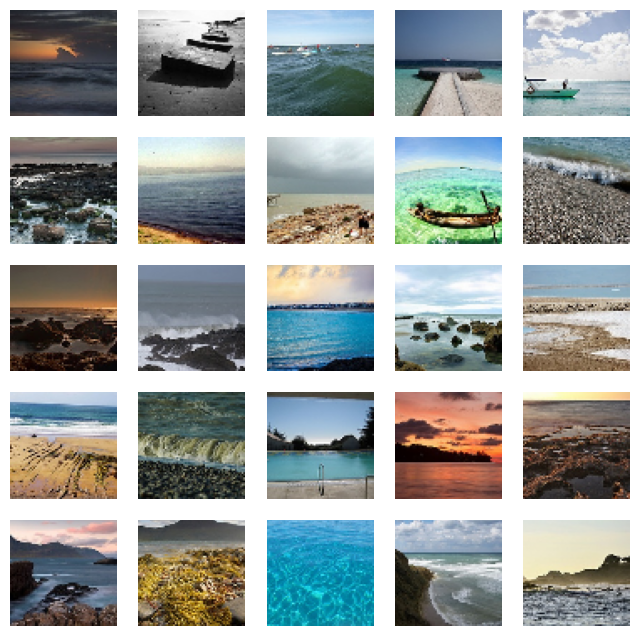

In [ ]:
# Fazendo uma vizualização das imagens do nosso dataset

_,ax = plt.subplots(5,5, figsize = (8,8)) 
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(images[5*i+j])
        ax[i,j].axis('off')

#### Construção da classe GAN

In [ ]:
'''A função init ,também chamada de "método construtor", possui a responsabilidade de criar o objeto daquela classe. 
Nela será contida todas as informações principais do objeto. Nesse caso a GAN'''

class GAN():
    def __init__(self):
        self.img_shape = (64, 64, 3)
        
        self.noise_size = 100

        optimizer = tf.keras.optimizers.legacy.Adam(0.0002,0.5)

        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', 
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        self.generator = self.build_generator()
        self.generator.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        self.combined = Sequential()
        self.combined.add(self.generator)
        self.combined.add(self.discriminator)
        
        self.discriminator.trainable = False
        
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        self.combined.summary()
        
    # Criando o gerador, os grandes kernels nas camadas convolucionais permitem que a rede crie estruturas complexas
    def build_generator(self):
        epsilon = 0.00001 # # Pequeno flutuador adicionado à variância para evitar a divisão por zero nas camadas BatchNormalization.
        noise_shape = (self.noise_size,)
        
        model = Sequential()
        
        model.add(Dense(4*4*512, activation='linear', input_shape=noise_shape)) # pegando a quantidade total de pixel
        model.add(LeakyReLU(alpha=0.2))
        model.add(Reshape((4, 4, 512))) # fazendo o reshape para matriz
        
        model.add(Conv2DTranspose(512, kernel_size=[4,4], strides=[2,2], padding="same", #com matriz feita, passamaos os valores dos filtros para começar a fazer as camadas Conv2D
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(256, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(128, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(64, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(3, kernel_size=[4,4], strides=[1,1], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))

        # Ativação padrão para uma estrutura de GAN
        model.add(Activation("tanh"))
        
        model.summary()

        noise = Input(shape=noise_shape)
        img = model(noise)

        return Model(noise, img)
    
    # Aqui construimos nosso discriminador, ele usara as imagens reais como um padrão comparativo.
    # Se nosso gerador não construir algo que seja parecido com o que nosso discriminador foi treinado, o discriminador não irá deixar passar essa imagem. 
    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(128, (3,3), padding='same', input_shape=self.img_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3,3)))
        model.add(Dropout(0.2))

        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3,3)))
        model.add(Dropout(0.3))

        model.add(Flatten())
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        
        model.summary()
        
        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, metrics_update=50, save_images=100, save_model=2000):

        X_train = np.array(images)
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5

        half_batch = int(batch_size / 2)
        
        mean_d_loss=[0,0]
        mean_g_loss=0

        for epoch in range(epochs):
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (half_batch, self.noise_size))
            gen_imgs = self.generator.predict(noise)

            # Treinando o discriminador
            
            # A perda do discriminador é a média das perdas durante o treinamento em imagens verdadeiras e falsas
            d_loss = 0.5 * np.add(self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1))),
                                  self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1))))

            # Treinando o gerador
            for _ in range(2):
                noise = np.random.normal(0, 1, (batch_size, self.noise_size))

                valid_y = np.array([1] * batch_size)
                g_loss = self.combined.train_on_batch(noise, valid_y)
            
            mean_d_loss[0] += d_loss[0]
            mean_d_loss[1] += d_loss[1]
            mean_g_loss += g_loss
            
            '''Será printado as losses e accuracy da network a cada 200 batches principalmente para ter certeza se a acuracia do discriminador
        não está estavel entre 50% ou 100% (o que pode significar que o discriminador não está performando muito bem)'''

            if epoch % metrics_update == 0:
                print ("%d [Loss do discriminador: %f, acc.: %.2f%%] [Loss do gerador: %f]" % (epoch, mean_d_loss[0]/metrics_update, 100*mean_d_loss[1]/metrics_update, mean_g_loss/metrics_update))
                mean_d_loss=[0,0]
                mean_g_loss=0
            
            # Salvando images
            if epoch % save_images == 0:
                self.save_images(epoch)
            
            # Temos a arquitetura do modelo, os pesos e o estado do otimizador
            # Dessa forma podemos reiniciar o treino exatamente onde foi parado
            if epoch % save_model == 0:
                self.generator.save("generator_%d" % epoch)
                self.discriminator.save("discriminator_%d" % epoch)

    # salvando 25 imagens geradas para ter a representação do espectros de imagem criadas pelo nosso gerador
    def save_images(self, epoch):
        noise = np.random.normal(0, 1, (25, self.noise_size))
        gen_imgs = self.generator.predict(noise)
        
        # redimencionando de [-1,1] para [0,1]
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(5,5, figsize = (8,8))

        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_imgs[5*i+j])
                axs[i,j].axis('off')

        plt.show()
        
        fig.savefig("IntelGenerated/Ambient_%d.png" % epoch)
        plt.close()

In [ ]:
# Criando um diretorio para as imagens geradas pela GAN
! mkdir IntelGenerated

#### Treinando GAN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 128)      512       
 hNormalization)                                        

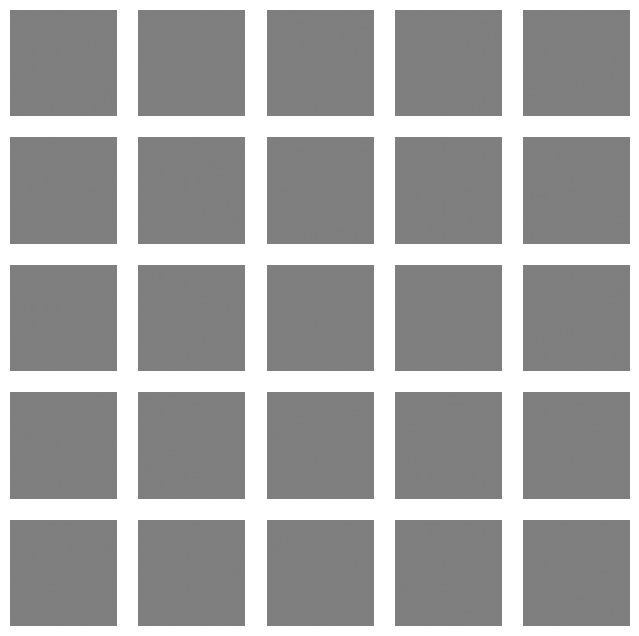

4/4 [==============================] - 0s 14ms/step
200 [Loss do discriminador: 0.605653, acc.: 71.06%] [Loss do gerador: 1.363261]
1/1 [==============================] - 0s 19ms/step


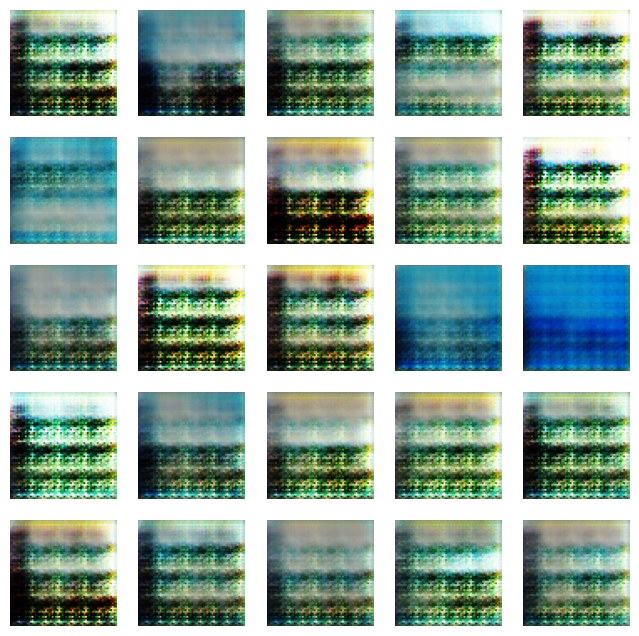

4/4 [==============================] - 0s 13ms/step
400 [Loss do discriminador: 0.571063, acc.: 70.54%] [Loss do gerador: 1.157570]
1/1 [==============================] - 0s 25ms/step


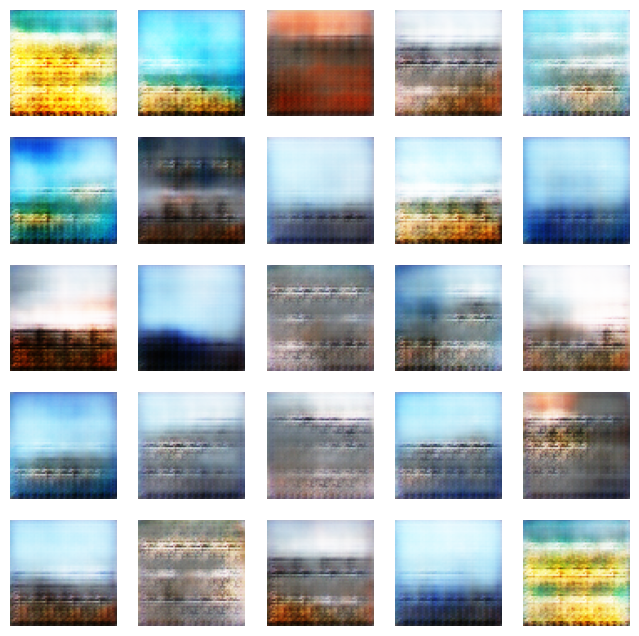

4/4 [==============================] - 0s 13ms/step
600 [Loss do discriminador: 0.578561, acc.: 69.45%] [Loss do gerador: 1.098217]
1/1 [==============================] - 0s 18ms/step


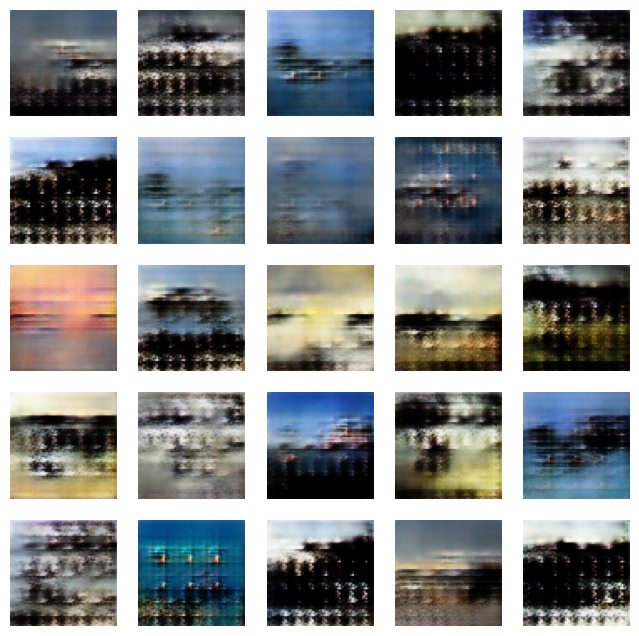

4/4 [==============================] - 0s 13ms/step
800 [Loss do discriminador: 0.518671, acc.: 75.65%] [Loss do gerador: 1.263314]
1/1 [==============================] - 0s 21ms/step


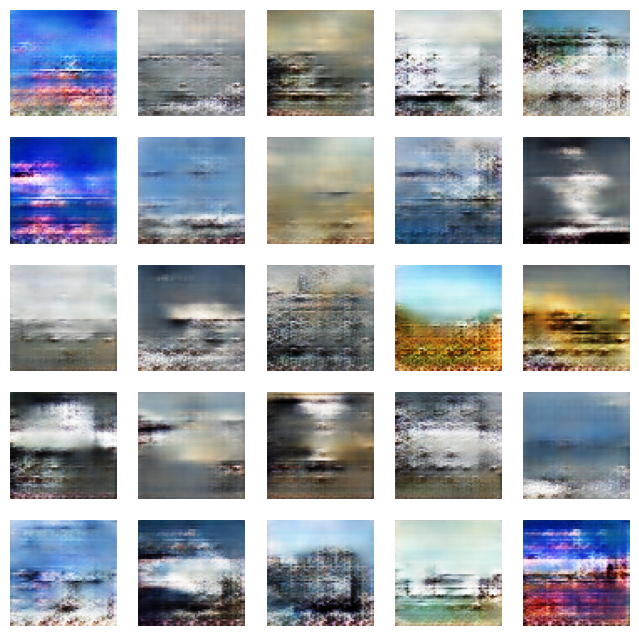

4/4 [==============================] - 0s 14ms/step
1000 [Loss do discriminador: 0.417078, acc.: 84.01%] [Loss do gerador: 1.591984]
1/1 [==============================] - 0s 18ms/step


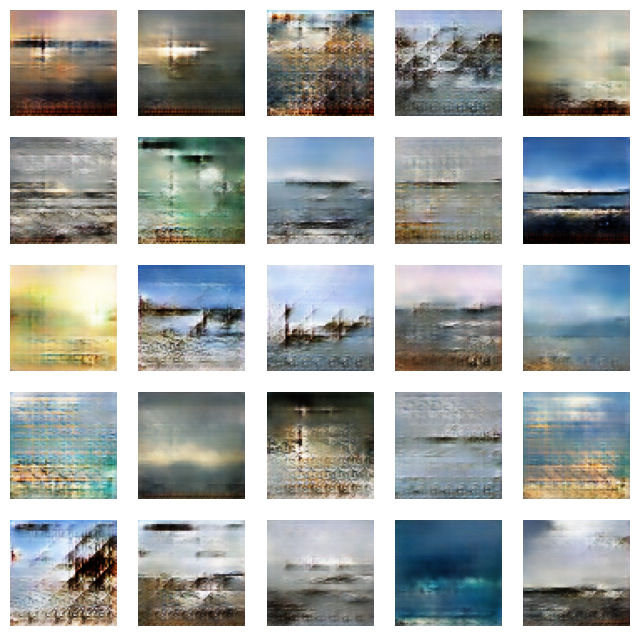

4/4 [==============================] - 0s 13ms/step
1200 [Loss do discriminador: 0.310862, acc.: 90.55%] [Loss do gerador: 2.018264]
1/1 [==============================] - 0s 18ms/step


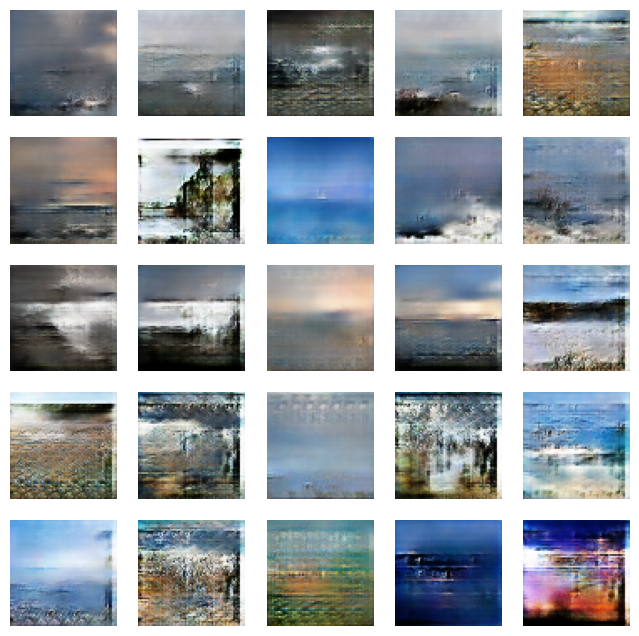

4/4 [==============================] - 0s 14ms/step
1400 [Loss do discriminador: 0.222799, acc.: 94.44%] [Loss do gerador: 2.561618]
1/1 [==============================] - 0s 27ms/step


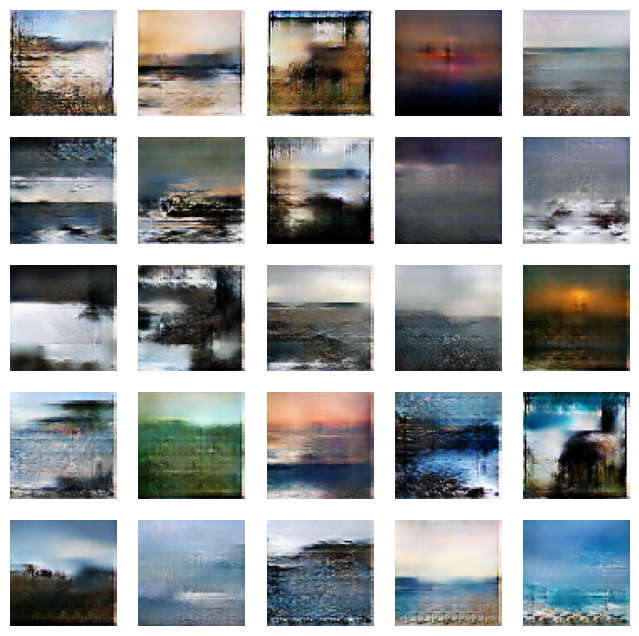

4/4 [==============================] - 0s 14ms/step


4/4 [==============================] - 0s 14ms/step
1600 [Loss do discriminador: 0.155048, acc.: 96.81%] [Loss do gerador: 3.142438]
1/1 [==============================] - 0s 20ms/step


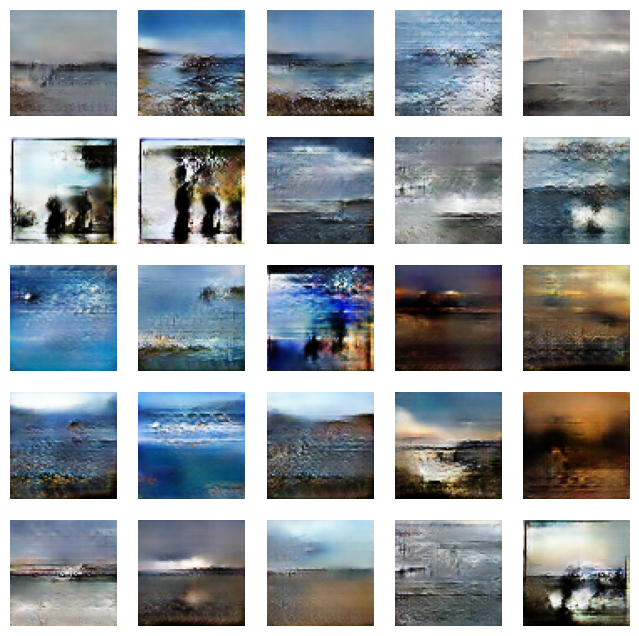

4/4 [==============================] - 0s 14ms/step
1800 [Loss do discriminador: 0.114389, acc.: 97.62%] [Loss do gerador: 3.667530]
1/1 [==============================] - 0s 18ms/step


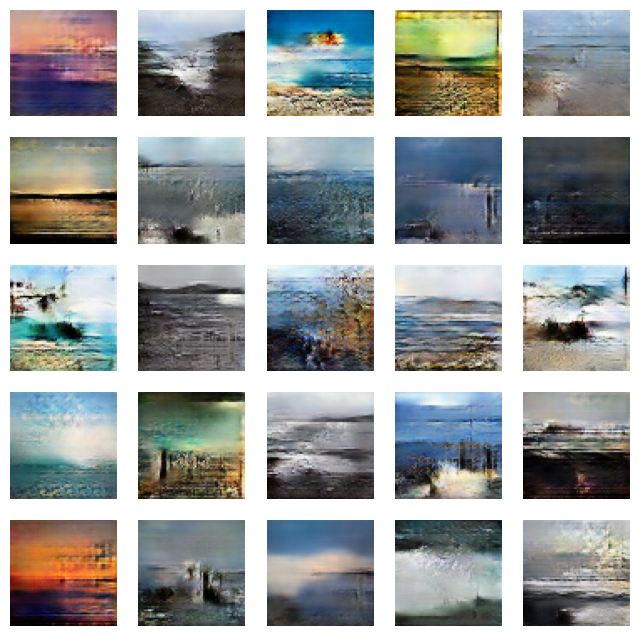

4/4 [==============================] - 0s 14ms/step
2000 [Loss do discriminador: 0.079071, acc.: 98.61%] [Loss do gerador: 4.270062]
1/1 [==============================] - 0s 19ms/step


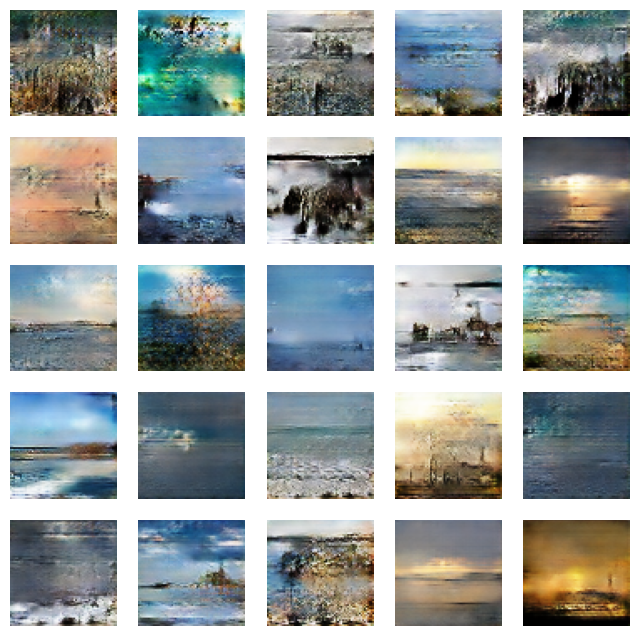

4/4 [==============================] - 0s 15ms/step
2200 [Loss do discriminador: 0.064617, acc.: 98.72%] [Loss do gerador: 4.763354]
1/1 [==============================] - 0s 19ms/step


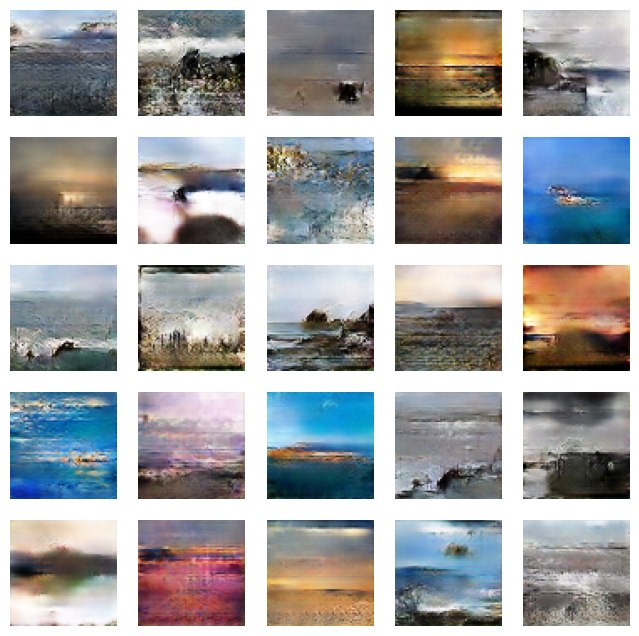

4/4 [==============================] - 0s 14ms/step


In [ ]:
gan = GAN()
gan.train(epochs=3201, batch_size=256, metrics_update=200, save_images=200, save_model=1500)

#### Criando GIF dos resultados

In [ ]:
import imageio

In [ ]:
import imageio
import os

# Nome do arquivo GIF a ser criado
gif_name = 'generated_images.gif'

# Caminho para a pasta que contém as imagens geradas
image_folder = '/content/IntelGenerated'

# Obtendo a lista de nomes de arquivos de imagens na pasta
images = sorted(os.listdir(image_folder))

# Criando uma lista com os caminhos completos de cada imagem
image_paths = [os.path.join(image_folder, file_name) for file_name in images]

# Definindo duração dos gifs
duracao = 0.5

# Criando o arquivo GIF usando a lista de caminhos das imagens
with imageio.get_writer(gif_name, mode='I', duration = duracao) as writer:
    for image_path in image_paths:
        image = imageio.imread(image_path)
        writer.append_data(image)

In [ ]:
from IPython.display import display, Image
with open('generated_images.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

# Build CNN models for Landscape Multi Classification

### Check GPU

In [ ]:
!nvidia-smi -L

In [ ]:
!nvidia-smi

### Unziped images

In [ ]:
import zipfile

zip_ref= zipfile.ZipFile("/content/intel-image-classification.zip", "r")
zip_ref.extractall()
zip_ref.close()

### Explore Images

In [ ]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/content/seg_train/seg_train/buildings/1001.jpg")
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.axis(False);

In [ ]:
img = mpimg.imread("/content/seg_train/seg_train/mountain/10002.jpg")
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.axis(False);

### Reduce train folder to 100 images of each category and transform image into data

In [ ]:
!pip install split_folders
import splitfolders

input_folder = "/content/seg_train/seg_train"
output = "10_percent_train_data" 

splitfolders.fixed(input_folder, output, seed=42, fixed=(200,200,200))

In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/10_percent_train_data/train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_rescaled = ImageDataGenerator(rescale= 1/255.)

In [ ]:
train_dir ="/content/10_percent_train_data/train"
val_dir = "/content/seg_test/seg_test/"
test_dir = "/content/seg_pred/seg_pred/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

In [ ]:
tf.random.set_seed(42)

TARGET_SIZE = (224,224)
BATCH_SIZE = 32

train_data = data_rescaled.flow_from_directory(directory=train_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=TARGET_SIZE,
                                               class_mode="categorical",
                                               shuffle=True)

val_data = data_rescaled.flow_from_directory(directory=val_dir,
                                             target_size=TARGET_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical",
                                             shuffle=False)

In [ ]:
len(train_data)

### Explore data

In [ ]:
labels=[key for key in train_data.class_indices]
# print(labels)
samples=train_data.__next__()

images=samples[0]
targets=samples[1]
plt.figure(figsize=(15,15))
for i in range(15):

    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=.3)
    plt.imshow(images[i])
    plt.axis('off')

### Model_1 CNN with regular train data

In [ ]:
len(class_names)

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(40, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(30, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(20, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
]) 

model_1.summary()

In [ ]:
model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        validation_data=val_data,
                        validation_steps=len(val_data))

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [ ]:
model_1.evaluate(val_data)

### Model_2 CNN with augmented train data

In [ ]:
data_augmented = ImageDataGenerator(rescale = 1/255.,
                                    rotation_range = 20,
                                    shear_range = 0.2,
                                    zoom_range= 0.2,
                                    width_shift_range=0.2,
                                    height_shift_range= 0.2,
                                    horizontal_flip=True)

In [ ]:
train_data_aug = data_augmented.flow_from_directory(directory=train_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=TARGET_SIZE,
                                               class_mode="categorical",
                                               shuffle=True)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(100, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(100, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(80, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(60, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
]) 

model_2.summary()

model_2.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data_aug,
                        epochs=50,
                        validation_data=val_data,
                        validation_steps=len(val_data))

In [ ]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7));

In [ ]:
model_2.evaluate(val_data)

### Model_3 CNN with augmented train data and Callbacks


1.   ModelCheckpoint
2.   ReduceLRONPlateau
3.   EarlyStopping

In [ ]:
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy",
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) 

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  patience=3)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(200, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(200, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(150, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(50, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
]) 

model_3.summary()

model_3.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data_aug,
                        epochs=100,
                        validation_data=val_data,
                        validation_steps=len(val_data),
                        callbacks=[model_checkpoint,
                                   early_stopping])

In [ ]:
checkpoint_path

In [ ]:
cloned_model = tf.keras.models.clone_model(model_3)
cloned_model.summary()

In [ ]:
cloned_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [ ]:
cloned_model.load_weights(checkpoint_path)

In [ ]:
results_model_3_loaded_weights = cloned_model.evaluate(val_data)

In [ ]:
pd.DataFrame(history_3.history).plot(figsize=(10, 7));